<a href="https://colab.research.google.com/github/2303A5229272/stat-ML/blob/main/SML_PROJ_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
d=pd.read_csv('/content/student_performance.csv')
print(d)

   StudentID      Name  Gender  AttendanceRate  StudyHoursPerWeek  \
0          1      John    Male              85                 15   
1          2     Sarah  Female              90                 20   
2          3      Alex    Male              78                 10   
3          4   Michael    Male              92                 25   
4          5      Emma  Female              88                 18   
5          6    Olivia  Female              95                 30   
6          7    Daniel    Male              70                  8   
7          8    Sophia  Female              85                 17   
8          9     James    Male              82                 12   
9         10  Isabella  Female              91                 22   

   PreviousGrade  ExtracurricularActivities ParentalSupport  FinalGrade  
0             78                          1            High          80  
1             85                          2          Medium          87  
2             65  

In [3]:
d['Gender']=d['Gender'].replace({'Female':0,'Male':1})
d['Name']=d['Name'].replace({'John':0,'Sarah':1,'Alex':2,'Michael':3,'Emma':4,'Olivia':5,'Daniel':6,'Sophia':7,'James':8,'Isabella':9})
d['ParentalSupport']=d['ParentalSupport'].replace({'Low':0,'High':1,'Medium':2})
print(d)

   StudentID  Name  Gender  AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
0          1     0       1              85                 15             78   
1          2     1       0              90                 20             85   
2          3     2       1              78                 10             65   
3          4     3       1              92                 25             90   
4          5     4       0              88                 18             82   
5          6     5       0              95                 30             88   
6          7     6       1              70                  8             60   
7          8     7       0              85                 17             77   
8          9     8       1              82                 12             70   
9         10     9       0              91                 22             86   

   ExtracurricularActivities  ParentalSupport  FinalGrade  
0                          1                1          80  

<ipython-input-3-9ceecfdef19d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['Gender']=d['Gender'].replace({'Female':0,'Male':1})
<ipython-input-3-9ceecfdef19d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['Name']=d['Name'].replace({'John':0,'Sarah':1,'Alex':2,'Michael':3,'Emma':4,'Olivia':5,'Daniel':6,'Sophia':7,'James':8,'Isabella':9})
<ipython-input-3-9ceecfdef19d>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `re

In [4]:
y=d['FinalGrade']
print(y)

0    80
1    87
2    68
3    92
4    85
5    90
6    62
7    78
8    72
9    88
Name: FinalGrade, dtype: int64


In [5]:
x=d.drop('FinalGrade',axis=1)
print(x)

   StudentID  Name  Gender  AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
0          1     0       1              85                 15             78   
1          2     1       0              90                 20             85   
2          3     2       1              78                 10             65   
3          4     3       1              92                 25             90   
4          5     4       0              88                 18             82   
5          6     5       0              95                 30             88   
6          7     6       1              70                  8             60   
7          8     7       0              85                 17             77   
8          9     8       1              82                 12             70   
9         10     9       0              91                 22             86   

   ExtracurricularActivities  ParentalSupport  
0                          1                1  
1                      

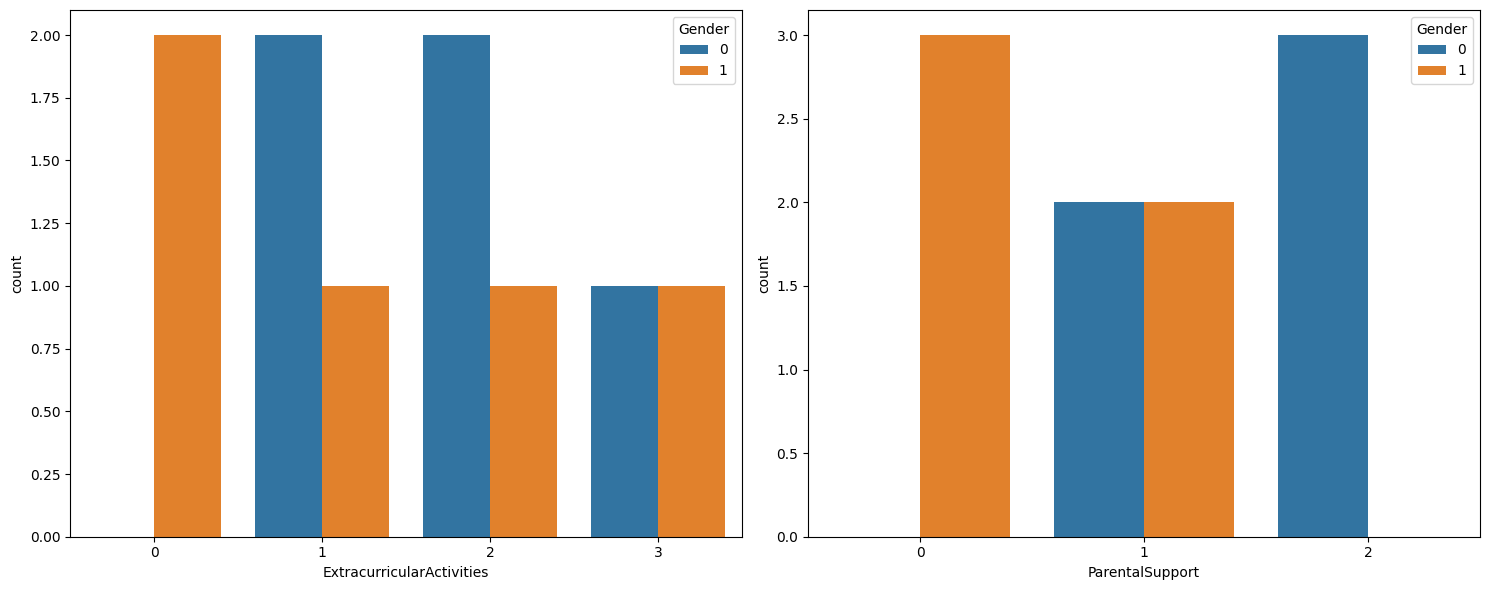

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axs=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x=d['ExtracurricularActivities'],hue=d['Gender'],ax=axs[0])
sns.countplot(x=d['ParentalSupport'],hue=d['Gender'],ax=axs[1])
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(d, test_size = 0.2)

In [9]:
x_train = train.iloc[:, :20].values
x_test = test.iloc[:, :20].values

In [10]:
y_train = train['FinalGrade'].values
y_test = test['FinalGrade'].values

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [12]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(x_train, y_train)

SVR()

In [13]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(x_train, y_train)
y_pred_train = model_svr.predict(x_train)
y_pred_test= model_svr.predict(x_test)

print(f'train data MSE score SVR: {mean_squared_error(y_train,y_pred_train )}')
print(f'train data MAE score SVR: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score SVR: {root_mean_squared_error(y_train,y_pred_train )}')
print()
print(f'test data MSE score SVR: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score SVR: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score SVR: {root_mean_squared_error(y_test, y_pred_test)}')
print()

train data MSE score SVR: 120.8228157380418
train data MAE score SVR: 7.768478854175646
train data RMSE score SVR: 10.991943219378538

test data MSE score SVR: 109.8906987085815
test data MAE score SVR: 9.73052785070157
test data RMSE score SVR: 10.482876452032691



In [14]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

Lasso()

In [15]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)


y_pred_lasso = model_lasso.predict(x_test)
y_pred_ridge = model_ridge.predict(x_test)

y_pred_lasso1 = model_lasso.predict(x_train)
y_pred_ridge1 = model_ridge.predict(x_train)

print(f'test data MSE score lasso: {mean_squared_error(y_test,y_pred_lasso)}')
print(f'test data MAE score lasso: {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'test data RMSE score lasso: {root_mean_squared_error(y_test, y_pred_lasso)}')
print()
print(f'train data MSE score lasso: {mean_squared_error(y_train,y_pred_lasso1)}')
print(f'train data MAE score lasso: {mean_absolute_error(y_train,y_pred_lasso1 )}')
print(f'train data RMSE score lasso: {root_mean_squared_error(y_train,y_pred_lasso1)}')
print()

test data MSE score lasso: 0.005094793945308727
test data MAE score lasso: 0.059299768663265695
test data RMSE score lasso: 0.07137782530526358

train data MSE score lasso: 0.010665763874736762
train data MAE score lasso: 0.09413510019835414
train data RMSE score lasso: 0.1032751851837447



In [16]:
from sklearn.linear_model import Lasso, Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)

Ridge()

In [17]:
print(f'train data MSE score ridge: {mean_squared_error(y_train,y_pred_ridge1)}')
print(f'train data MAE score ridge: {mean_absolute_error(y_train,y_pred_ridge1 )}')
print(f'train data RMSE score ridge: {root_mean_squared_error(y_train,y_pred_ridge1)}')
print()
print(f'test data MSE score ridge: {mean_squared_error(y_test,y_pred_ridge)}')
print(f'test data MAE score ridge: {mean_absolute_error(y_test,y_pred_ridge )}')
print(f'test data RMSE score ridge: {root_mean_squared_error(y_test,y_pred_ridge)}')
print()


train data MSE score ridge: 0.015588412052274708
train data MAE score ridge: 0.08731282754420722
train data RMSE score ridge: 0.12485356243325502

test data MSE score ridge: 0.0643820170627089
test data MAE score ridge: 0.24032900768199994
test data RMSE score ridge: 0.25373611698516413



In [18]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(x_train, y_train)

KNeighborsRegressor()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error

y_pred_knn = model_knn.predict(x_test)
y_pred_knn1 = model_knn.predict(x_train)

mse = mean_squared_error(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)
rmse = root_mean_squared_error(y_test, y_pred_knn)

mse1=mean_squared_error(y_train, y_pred_knn1)
mae1=mean_absolute_error(y_train, y_pred_knn1)
rmse1=root_mean_squared_error(y_train, y_pred_knn1)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print()
print(f"Mean Squared Error: {mse1}")
print(f"Mean Absolute Error: {mae1}")
print(f"Root Mean Squared Error: {rmse1}")

Mean Squared Error: 8.720000000000004
Mean Absolute Error: 2.6000000000000014
Root Mean Squared Error: 2.952964612046681

Mean Squared Error: 36.11
Mean Absolute Error: 4.15
Root Mean Squared Error: 6.009159675029446


In [22]:
import numpy as np
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
def bootstrap_metrics_knn(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):

        x_train_resampled, y_train_resampled = resample(x_train, y_train)

        model.fit(x_train_resampled, y_train_resampled)

        y_pred = model.predict(x_test)

        mse_values.append(mean_squared_error(y_test, y_pred))
        mae_values.append(mean_absolute_error(y_test, y_pred))
        rmse_values.append(root_mean_squared_error(y_test, y_pred))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)
mse_knn, mae_knn, rmse_knn = bootstrap_metrics_knn(model_knn, x_train, y_train, x_test, y_test)

print(f"Bootstrapped MSE for KNN Regression: {mse_knn.mean()}")
print(f"Confidence intervals for KNN Regression MSE: {np.percentile(mse_knn, [2.5, 97.5])}")
print(f"Bootstrapped MAE for KNN Regression: {mae_knn.mean()}")
print(f"Confidence intervals for KNN Regression MAE: {np.percentile(mae_knn, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for KNN Regression: {rmse_knn.mean()}")
print(f"Confidence intervals for KNN Regression RMSE: {np.percentile(rmse_knn, [2.5, 97.5])}")

Bootstrapped MSE for KNN Regression: 28.01
Confidence intervals for KNN Regression MSE: [ 1.793 61.681]
Bootstrapped MAE for KNN Regression: 4.39
Confidence intervals for KNN Regression MAE: [1.09 7.71]
Bootstrapped RMSE for KNN Regression: 4.7862727043005115
Confidence intervals for KNN Regression RMSE: [1.33519405 7.85100299]


In [23]:
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

def bootstrap_metrics(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)
        mse_values.append(mean_squared_error(y_test, y_pred))
        mae_values.append(mean_absolute_error(y_test, y_pred))
        rmse_values.append(root_mean_squared_error(y_test, y_pred))
    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)

mse_lr, mae_lr, rmse_lr = bootstrap_metrics(model_lr, x_train, y_train, x_test, y_test)


print(f"Bootstrapped MSE for Linear Regression: {mse_lr.mean()}")
print(f"Confidence intervals for Linear Regression MSE: {np.percentile(mse_lr, [2.5, 97.5])}")
print(f"Bootstrapped MAE for Linear Regression: {mae_lr.mean()}")
print(f"Confidence intervals for Linear Regression MAE: {np.percentile(mae_lr, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for Linear Regression: {rmse_lr.mean()}")
print(f"Confidence intervals for Linear Regression RMSE: {np.percentile(rmse_lr, [2.5, 97.5])}")

Bootstrapped MSE for Linear Regression: 0.24463182473173864
Confidence intervals for Linear Regression MSE: [0.00741462 0.59544065]
Bootstrapped MAE for Linear Regression: 0.39006430878773346
Confidence intervals for Linear Regression MAE: [0.07757366 0.72154079]
Bootstrapped RMSE for Linear Regression: 0.44027941951762906
Confidence intervals for Linear Regression RMSE: [0.08599705 0.77123525]


In [24]:
import numpy as np
from sklearn.utils import resample
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

def bootstrap_metrics_svr(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):

        x_train_resampled, y_train_resampled = resample(x_train, y_train)

        model.fit(x_train_resampled, y_train_resampled)

        y_pred = model.predict(x_test)

        mse_values.append(mean_squared_error(y_test, y_pred))
        mae_values.append(mean_absolute_error(y_test, y_pred))
        rmse_values.append(root_mean_squared_error(y_test, y_pred))
    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)


mse_svr, mae_svr, rmse_svr = bootstrap_metrics_svr(model_svr, x_train, y_train, x_test, y_test)

print(f"Bootstrapped MSE for SVR: {mse_svr.mean()}")
print(f"Confidence intervals for SVR MSE: {np.percentile(mse_svr, [2.5, 97.5])}")
print(f"Bootstrapped MAE for SVR: {mae_svr.mean()}")
print(f"Confidence intervals for SVR MAE: {np.percentile(mae_svr, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for SVR: {rmse_svr.mean()}")
print(f"Confidence intervals for SVR RMSE: {np.percentile(rmse_svr, [2.5, 97.5])}")

Bootstrapped MSE for SVR: 103.80242297447805
Confidence intervals for SVR MSE: [ 24.77832565 175.67830332]
Bootstrapped MAE for SVR: 9.035564962218022
Confidence intervals for SVR MAE: [ 4.25062846 12.65347615]
Bootstrapped RMSE for SVR: 9.805608978548879
Confidence intervals for SVR RMSE: [ 4.88024228 13.25149679]
